<a href="https://colab.research.google.com/github/shravanishinde-glitch/PRODIGY_GENAI_04/blob/main/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [3]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(6, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 1, 4, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [5]:
G = Generator()
D = Discriminator()

loss_fn = nn.BCELoss()
l1_loss = nn.L1Loss()

optimizer_G = torch.optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(D.parameters(), lr=0.0002)


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

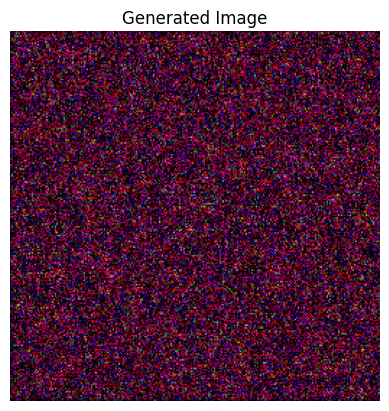

In [6]:
input_image = torch.randn(1, 3, 256, 256)
generated_image = G(input_image)

plt.imshow(generated_image[0].permute(1,2,0).detach())
plt.title("Generated Image")
plt.axis("off")
